###**Experiment 4: Policy Iteration**

###**Title: Policy Iteration**

Name: Aparna Iyer

PRN: 22070126017

Branch: AI-ML A1

Batch: 2022-2026

Import the necessary software libraries.

In [42]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy,plot_values,test_agent #Visualizing policy, values and testing of agent
np.object = object

Initialize the Environment.

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


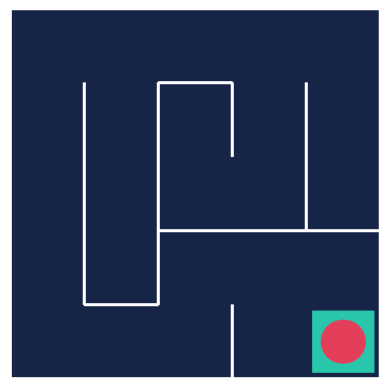

In [44]:
#Instantiate Maze() Environment

env = Maze()
frame = env.render(mode='rgb_array')
#Display the Frame
plt.axis('off')
plt.imshow(frame)

In [45]:
print(f"Observation Space shape: {env.observation_space.nvec}") #Dimensions of Observation Space
#nvec: Property of the MultiDiscrete Space
print(f"Number of actions: {env.action_space.n}") #Number of permissible actions

Observation Space shape: [5 5]
Number of actions: 4


Define the policy, pi(.|s).

Create the policy pi(.|s).

In [47]:
policy_probs = np.full((5,5,4),0.25) #Equiprobable

In [48]:
def policy(state):
  return policy_probs[state]  #The probabilty corresponding to the state is returned

Test the policy with state (0,0).

In [49]:
action_probabilities = policy((0,0))
for action,prob in zip(range(4),action_probabilities):
  print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


See how the random policy does in the maze.

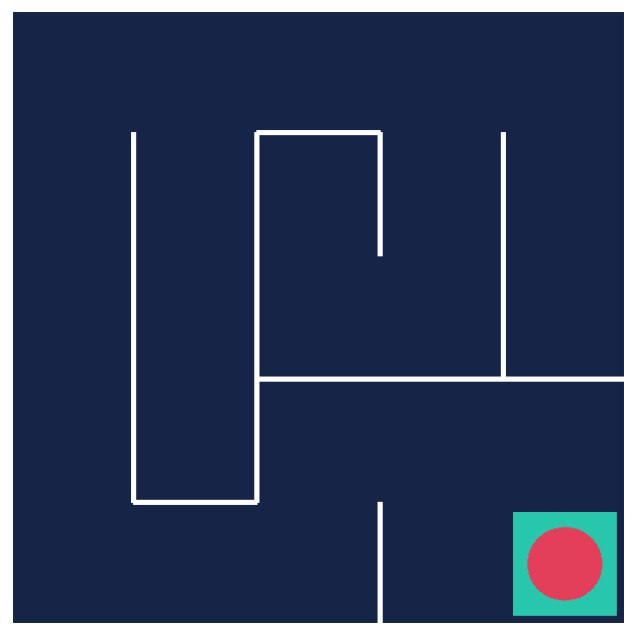

In [50]:
test_agent(env,policy,episodes=1)  #For a single episode

Plot the Policy.

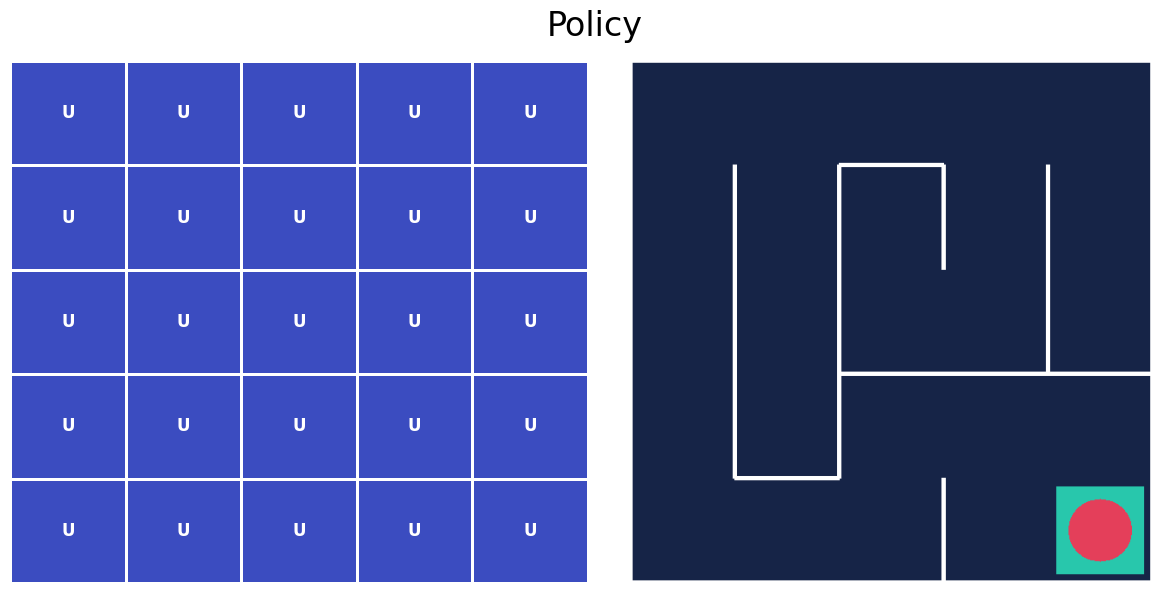

In [51]:
plot_policy(policy_probs,frame) #Plot the policy (the Actions that can be taken in each state)

Define value table, V(s)

Create the V(s) Table.

In [52]:
state_values = np.zeros(shape=(5,5)) #5x5 matrix with all 0s

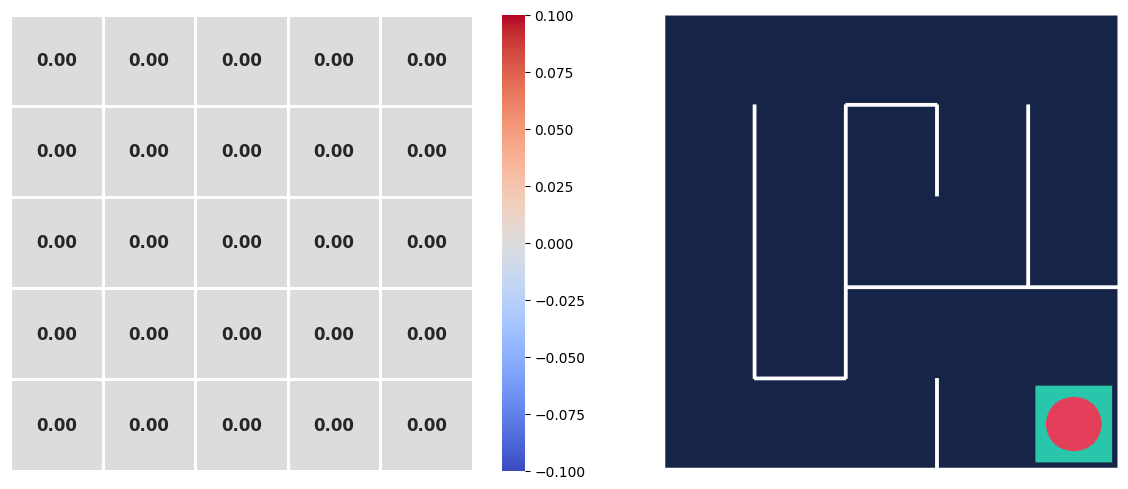

In [53]:
plot_values(state_values,frame)  #to visualize the value function's progression over iterations

In [54]:
def policy_evaluation(policy_probs,state_values,theta=1e-6,gamma=0.99):
  delta=float("inf")

  while delta>theta: #Theta: 10^(-6)
    delta=0

    for row in range(5):
      for col in range(5):
        old_value = state_values[(row,col)] #Value function for row and column coordinates
        new_value = 0 #Initialize

        action_probabilities = policy_probs[(row,col)] #

        for action, prob in enumerate(action_probabilities):
          next_state,reward,_,_= env.simulate_step((row,col),action) #next_state,reward,done(0/1),extra_info
          new_value += prob * (reward + gamma * state_values[next_state]) #Bellman Equation

        state_values[(row,col)] = new_value

        delta = max(delta,abs(old_value-new_value))


In [55]:
def policy_improvement(policy_probs,state_valiues,gamma=0.99):

  policy_stable = True

  for row in range(5):
    for col in range(5):
      old_action = policy_probs[(row,col)].argmax() #The position for which value is maximum
      new_action = None
      max_qsa = float("-inf")

      for action in range(4):
        next_state,reward,_,_ = env.simulate_step((row,col),action)
        qsa = reward + gamma * state_values[next_state]
        if qsa>max_qsa:
          max_qsa = qsa
          new_action = action

      action_probs = np.zeros(4)
      action_probs[new_action] = 1.
      policy_probs[(row,col)] = action_probs

      if new_action!=old_action:
        policy_stable = False  #There is scope for improvement of the policy, until it's stable.


    return policy_stable

In [56]:
def policy_iteration(policy_probs,state_values,theta=1e-6,gamma=0.99):

  #Evaluation, then Improvement
  policy_stable = False

  while not policy_stable:

    policy_evaluation(policy_probs,state_values,theta,gamma) #Evaluate the policy

    policy_stable = policy_improvement(policy_probs,state_values,gamma) #Improve the policy

In [57]:
policy_iteration(policy_probs,state_values)

Show Results.

Show resulting Value Table, V(s).

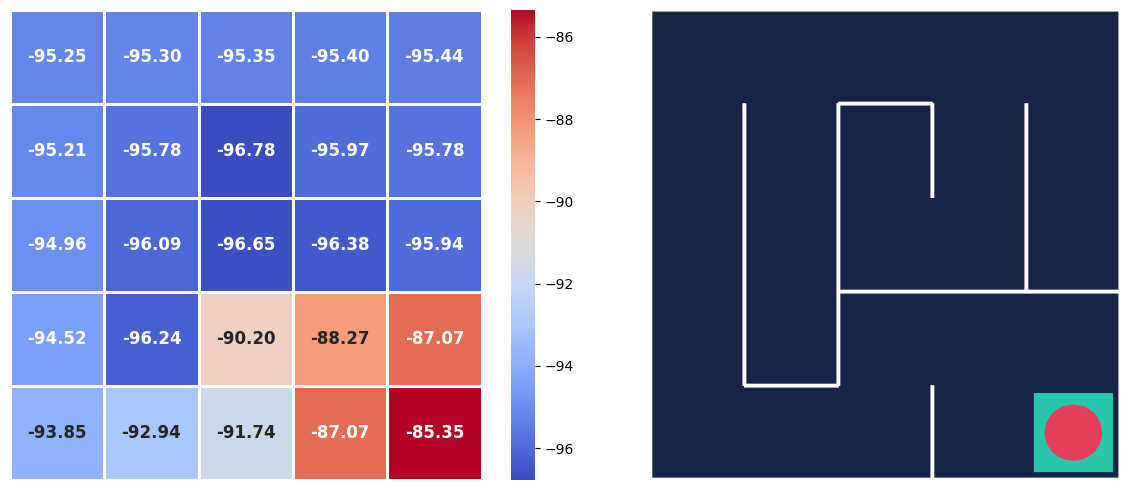

In [58]:
plot_values(state_values,frame)

Show resulting policy, pi(.|s).

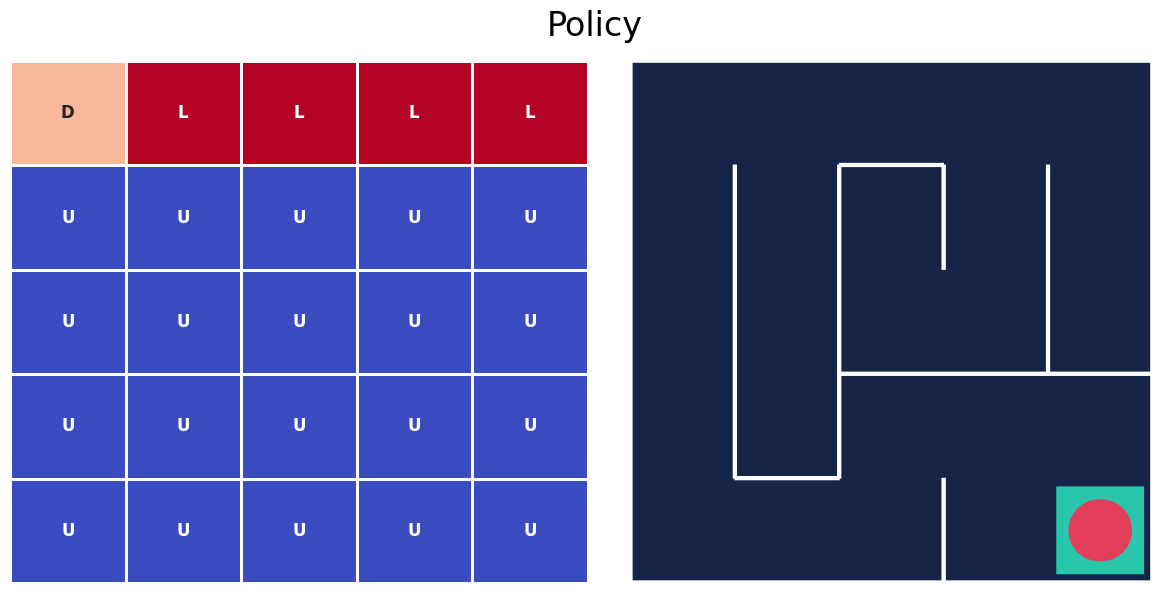

In [59]:
plot_policy(policy_probs,frame)

Test the resulting agent.

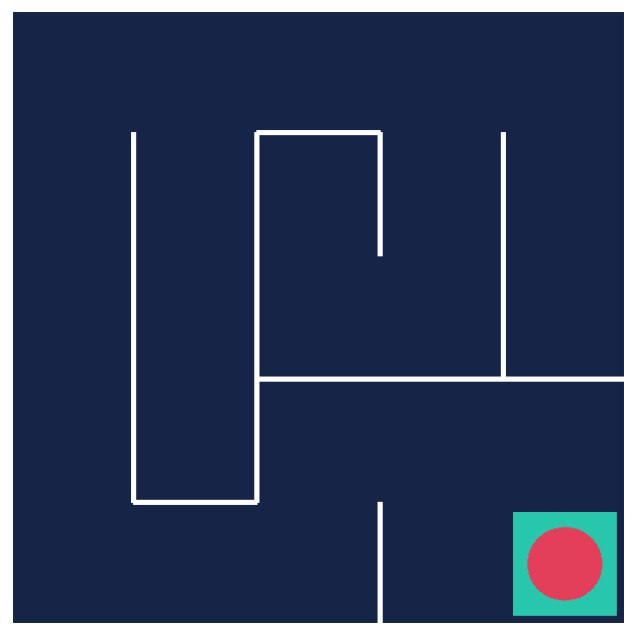

In [60]:
test_agent(env,policy)